In [ ]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10, FashionMNIST, Food101
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from Augmentor import Augmentor
from dataset_wrapper import DatasetWrapper
from STESAugmentor import STESAugmentor

In [3]:
#check versions of all packages
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)
print("numpy version:", np.__version__)

torch version: 2.6.0+cpu
torchvision version: 0.21.0+cpu
numpy version: 1.26.4


## loading datasets with custom augmentation

load datasets with preprocessing:

In [4]:
def get_transform(is_grayscale=False):
    transform_list = [
            transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),  # Resize to 224x224
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained normalization
        ]
    if is_grayscale:
        transform_list = [
            transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        ] + transform_list  # Keep grayscale conversion before augmentation & normalization
    
    return transforms.Compose(transform_list)

# Load training datasets with no special augumentation
cifar10_train = CIFAR10(root="./data", train=True, transform=get_transform(), download=True)
fashion_mnist_train = FashionMNIST(root="./data", train=True, transform=get_transform(is_grayscale=True), download=True)

# Load test datasets with no special augumentation
cifar10_test = CIFAR10(root="./data", train=False, transform=get_transform(), download=True)
fashion_mnist_test = FashionMNIST(root="./data", train=False, transform=get_transform(is_grayscale=True), download=True)

add augumentations using wrapper:

In [ ]:
augmentor = Augmentor()
stes_augmentor = STESAugmentor()
cifar_10_train_wrapped_aug = DatasetWrapper(cifar10_train, augmentor, "different") #do zmiany w zależności 
cifar_10_train_wrapped_stes = DatasetWrapper(cifar10_train, stes_augmentor)

fashion_mnist_train_wrapped_aug = DatasetWrapper(fashion_mnist_train, augmentor, "different")
fashion_mnist_train_wrapped_stes = DatasetWrapper(fashion_mnist_train, stes_augmentor)

#do zbiorów testowych nie potrzebujemy wrappera bo nie robimy augmentacji


dataloaders:

In [9]:
# Create DataLoaders
batch_size = 64

# DataLoader for training datasets
cifar10_train_loader = DataLoader(cifar_10_train_wrapped_aug, batch_size=batch_size, shuffle=True)
fashion_mnist_train_loader = DataLoader(fashion_mnist_train_wrapped_aug, batch_size=batch_size, shuffle=True)

# DataLoader for test datasets
cifar10_test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)
fashion_mnist_test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=False)

# Function to display images in a grid
def imshow(images, labels, classes, num_images=10):
    # Convert tensor to numpy and transpose from (N, C, H, W) to (N, H, W, C)
    images = images.numpy().transpose((0, 2, 3, 1))

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(images[i])
        plt.title(classes[labels[i]])  # Display the label
        plt.axis('off')
    plt.show()

# Define class names for both datasets
cifar10_classes = cifar10_train.classes
fashion_mnist_classes = fashion_mnist_train.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0390445..2.689785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2739873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9247153..2.912407].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6790822..2.5356624].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8948535..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.622571..2.9656863].
C

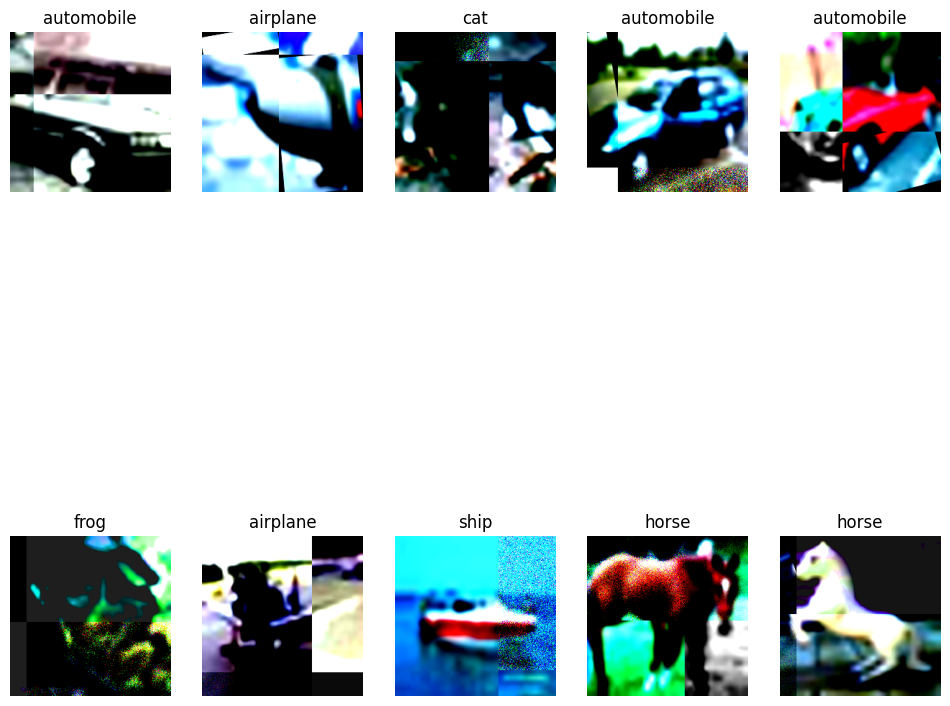

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179042..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6400001..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1179042..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6400001..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.033924..2.398955].

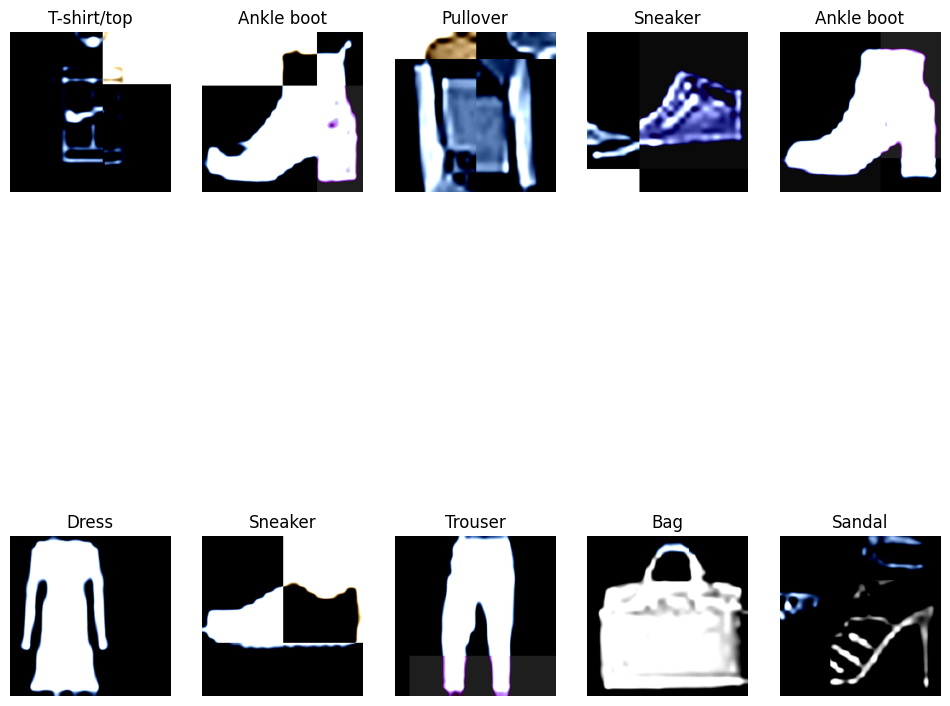

In [10]:
# Get first 10 images and labels from CIFAR-10 train dataset
cifar10_images, cifar10_labels = next(iter(cifar10_train_loader))
imshow(cifar10_images[:10], cifar10_labels[:10], cifar10_classes)

# Get first 10 images and labels from Fashion-MNIST train dataset
fashion_mnist_images, fashion_mnist_labels = next(iter(fashion_mnist_train_loader))
imshow(fashion_mnist_images[:10], fashion_mnist_labels[:10], fashion_mnist_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..3.117904].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.873341..2.6400003].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6726604..2.6400003].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8892884..2.7411594].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9481792..2.0947855].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..1.90

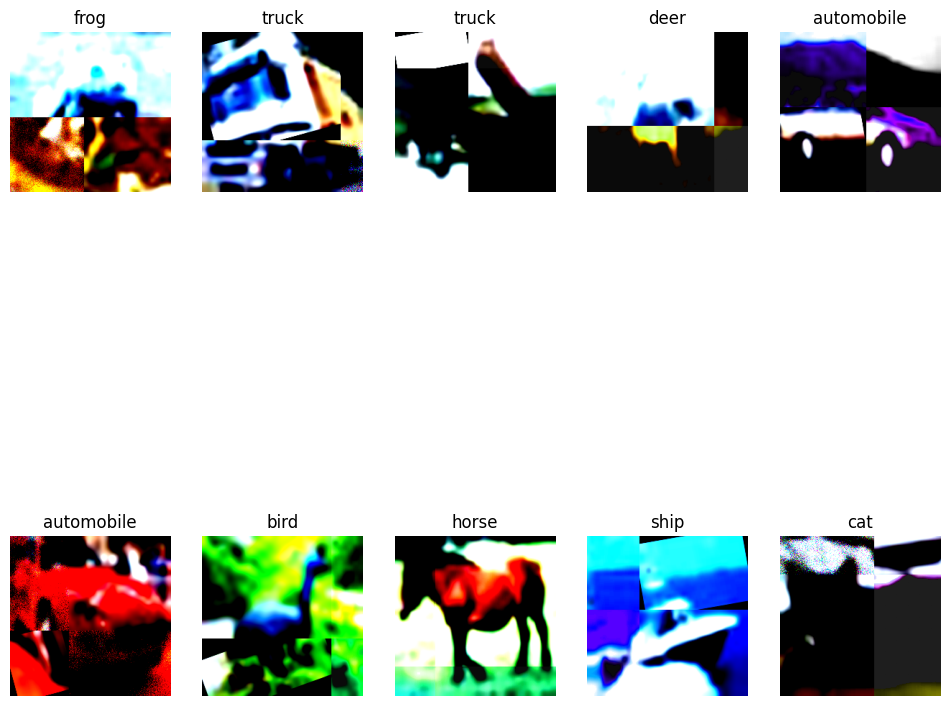

In [11]:
subset_indices = list(range(10))
cifar10_subset = torch.utils.data.Subset(cifar_10_train_wrapped_aug, subset_indices)
subset_loader = DataLoader(cifar10_subset, batch_size=10, shuffle=False)
sample_images, sample_labels = next(iter(subset_loader))
imshow(sample_images, sample_labels, cifar10_classes)

downloading models

In [8]:
# Load EfficientNet models (both pretrained and not pretrained)
# EfficientNet-B0
efficientnet_b0_pretrained = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
efficientnet_b0_non_pretrained = models.efficientnet_b0(weights=None)

# EfficientNet-B1 (you can change to B2, B3, etc. similarly)
efficientnet_b1_pretrained = models.efficientnet_b1(weights=models.EfficientNet_B1_Weights.IMAGENET1K_V1)
efficientnet_b1_non_pretrained = models.efficientnet_b1(weights=None)

sample training

In [9]:
# Hyperparameters
batch_size = 64
epochs = 5  # You can adjust the number of epochs
learning_rate = 0.001

uwaga! gorąco nie polecam puszczać na CPU

In [10]:
# Initialize EfficientNet model (without pretrained weights)
efficientnet_b0 = efficientnet_b0_non_pretrained

# Modify the last layer for CIFAR-10 (10 classes)
efficientnet_b0.classifier[1] = nn.Linear(in_features=1280, out_features=10)

# Set up device (CUDA if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(efficientnet_b0.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, optimizer, criterion, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

# Start training
train(efficientnet_b0, cifar10_train_loader, optimizer, criterion, device)

# Evaluate the model
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Test Loss: {running_loss/len(test_loader):.4f}, Test Accuracy: {100 * correct/total:.2f}%")

# Test the model
evaluate(efficientnet_b0, cifar10_test_loader, criterion, device)

KeyboardInterrupt: 

output z colaba:  
Epoch 1/5, Loss: 1.4548, Accuracy: 46.23%
Epoch 2/5, Loss: 0.8745, Accuracy: 69.28%
Epoch 3/5, Loss: 0.6295, Accuracy: 78.23%
Epoch 4/5, Loss: 0.4999, Accuracy: 82.81%
Epoch 5/5, Loss: 0.4169, Accuracy: 85.60%
Test Loss: 0.4759, Test Accuracy: 84.51%


In [ ]:
# Save the trained model
torch.save(efficientnet_b0.state_dict(), "efficientnet_cifar10_empty.pth")
print("Model saved as efficientnet_cifar10_empty.pth")

## loading datasets - skip for now


100%|██████████| 170M/170M [10:20<00:00, 275kB/s]  


Extracting ./data\cifar-10-python.tar.gz to ./data


100%|██████████| 26.4M/26.4M [00:27<00:00, 972kB/s] 


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 1.31MB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:04<00:00, 1.09MB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.82MB/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7240347..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4384314..1.9577874].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..1.7633053].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.343704].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4842881..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7411594..1.7282913].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.5

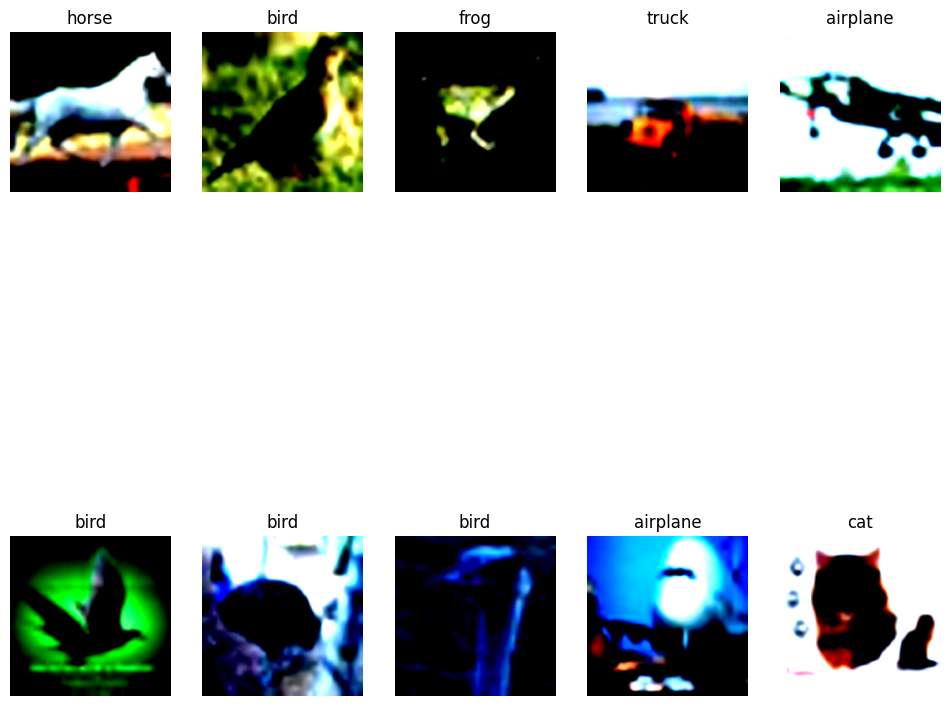

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to 

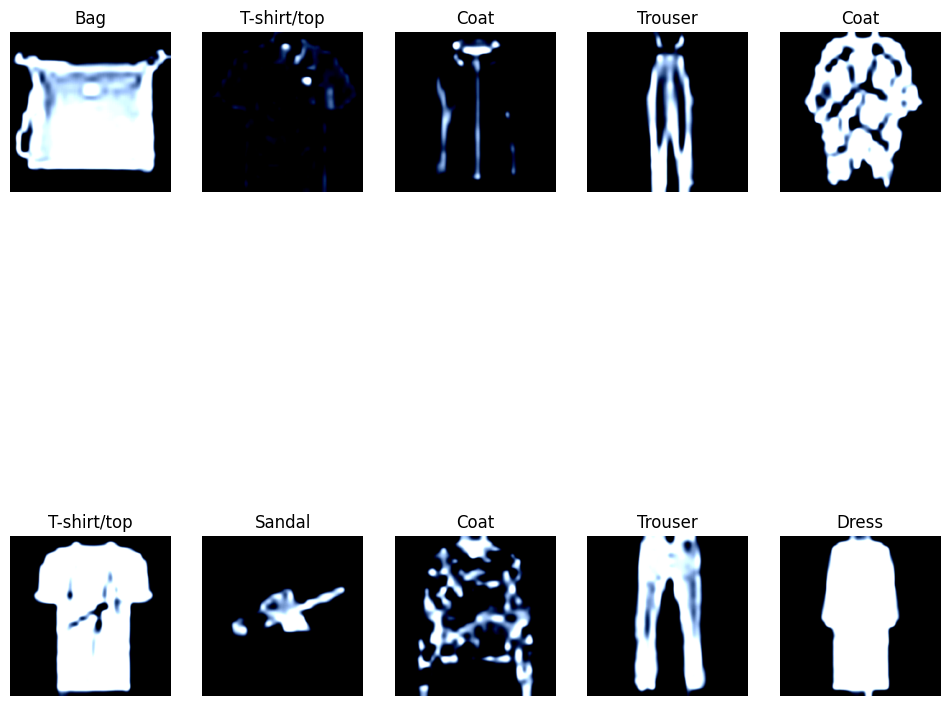

In [ ]:
# Define a common transform for the datasets
def get_transform(is_grayscale=False):
    transform_list = [
        transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),  # Resize to 64x64
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained normalization
    ]
    if is_grayscale:
        transform_list = [
            transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        ] + transform_list
    return transforms.Compose(transform_list)

# Load training datasets
cifar10_train = CIFAR10(root="./data", train=True, transform=get_transform(), download=True)
fashion_mnist_train = FashionMNIST(root="./data", train=True, transform=get_transform(is_grayscale=True), download=True)

# Load test datasets
cifar10_test = CIFAR10(root="./data", train=False, transform=get_transform(), download=True)
fashion_mnist_test = FashionMNIST(root="./data", train=False, transform=get_transform(is_grayscale=True), download=True)

# Create DataLoaders
batch_size = 64

# DataLoader for training datasets
cifar10_train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
fashion_mnist_train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)

# DataLoader for test datasets
cifar10_test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)
fashion_mnist_test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=False)

# Function to display images in a grid
def imshow(images, labels, classes, num_images=10):
    # Convert tensor to numpy and transpose from (N, C, H, W) to (N, H, W, C)
    images = images.numpy().transpose((0, 2, 3, 1))

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(images[i])
        plt.title(classes[labels[i]])  # Display the label
        plt.axis('off')
    plt.show()

# Define class names for both datasets
cifar10_classes = cifar10_train.classes
fashion_mnist_classes = fashion_mnist_train.classes

# Get first 10 images and labels from CIFAR-10 train dataset
cifar10_images, cifar10_labels = next(iter(cifar10_train_loader))
imshow(cifar10_images[:10], cifar10_labels[:10], cifar10_classes)

# Get first 10 images and labels from Fashion-MNIST train dataset
fashion_mnist_images, fashion_mnist_labels = next(iter(fashion_mnist_train_loader))
imshow(fashion_mnist_images[:10], fashion_mnist_labels[:10], fashion_mnist_classes)
